# Jacobi Iterative Method for Solving Linear Systems

## Introduction

The **Jacobi iterative method** is a classical algorithm for solving systems of linear equations of the form:

$$\mathbf{A}\mathbf{x} = \mathbf{b}$$

where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is a square matrix, $\mathbf{x} \in \mathbb{R}^n$ is the unknown vector, and $\mathbf{b} \in \mathbb{R}^n$ is the right-hand side vector.

## Mathematical Formulation

### Matrix Decomposition

The Jacobi method decomposes the matrix $\mathbf{A}$ into its diagonal and off-diagonal components:

$$\mathbf{A} = \mathbf{D} + \mathbf{R}$$

where:
- $\mathbf{D}$ is the diagonal matrix containing only the diagonal elements of $\mathbf{A}$
- $\mathbf{R} = \mathbf{L} + \mathbf{U}$ contains the lower and upper triangular parts (excluding diagonal)

### Iterative Formula

The system $\mathbf{A}\mathbf{x} = \mathbf{b}$ can be rewritten as:

$$\mathbf{D}\mathbf{x} = \mathbf{b} - \mathbf{R}\mathbf{x}$$

Leading to the iteration scheme:

$$\mathbf{x}^{(k+1)} = \mathbf{D}^{-1}(\mathbf{b} - \mathbf{R}\mathbf{x}^{(k)})$$

### Component-wise Form

For each component $i$, the update rule is:

$$x_i^{(k+1)} = \frac{1}{a_{ii}}\left(b_i - \sum_{j \neq i} a_{ij}x_j^{(k)}\right)$$

## Convergence Criteria

The Jacobi method converges if:

1. **Strict diagonal dominance**: $|a_{ii}| > \sum_{j \neq i} |a_{ij}|$ for all $i$
2. **Spectral radius condition**: $\rho(\mathbf{D}^{-1}\mathbf{R}) < 1$

The convergence rate depends on the spectral radius of the iteration matrix $\mathbf{G} = \mathbf{D}^{-1}\mathbf{R}$.

## Error Analysis

The error at iteration $k$ satisfies:

$$\|\mathbf{e}^{(k)}\| \leq \|\mathbf{G}\|^k \|\mathbf{e}^{(0)}\|$$

where $\mathbf{e}^{(k)} = \mathbf{x}^{(k)} - \mathbf{x}^*$ is the error vector and $\mathbf{x}^*$ is the true solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Set random seed for reproducibility
np.random.seed(42)

## Implementation

### Jacobi Iteration Algorithm

In [2]:
def jacobi_iteration(A, b, x0=None, tol=1e-10, max_iter=1000):
    """
    Solve Ax = b using the Jacobi iterative method.
    
    Parameters:
    -----------
    A : ndarray
        Coefficient matrix (n x n)
    b : ndarray
        Right-hand side vector (n,)
    x0 : ndarray, optional
        Initial guess (default: zeros)
    tol : float
        Convergence tolerance
    max_iter : int
        Maximum number of iterations
    
    Returns:
    --------
    x : ndarray
        Solution vector
    residuals : list
        History of residual norms
    errors : list
        History of error norms (if true solution known)
    """
    n = len(b)
    
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    
    # Extract diagonal and compute D^{-1}
    D = np.diag(A)
    R = A - np.diag(D)
    
    residuals = []
    x_history = [x.copy()]
    
    for k in range(max_iter):
        # Jacobi iteration: x^{k+1} = D^{-1}(b - Rx^k)
        x_new = (b - R @ x) / D
        
        # Compute residual
        residual = norm(A @ x_new - b)
        residuals.append(residual)
        
        # Check convergence
        if norm(x_new - x) < tol:
            x = x_new
            x_history.append(x.copy())
            break
        
        x = x_new
        x_history.append(x.copy())
    
    return x, residuals, x_history

### Helper Functions

In [3]:
def create_diagonally_dominant_matrix(n, dominance_factor=3.0):
    """
    Create a strictly diagonally dominant matrix to ensure convergence.
    
    Parameters:
    -----------
    n : int
        Matrix dimension
    dominance_factor : float
        Factor by which diagonal exceeds row sum
    
    Returns:
    --------
    A : ndarray
        Diagonally dominant matrix
    """
    # Create random off-diagonal elements
    A = np.random.randn(n, n)
    
    # Make diagonally dominant
    for i in range(n):
        row_sum = np.sum(np.abs(A[i, :])) - np.abs(A[i, i])
        A[i, i] = dominance_factor * row_sum
    
    return A


def compute_spectral_radius(A):
    """
    Compute the spectral radius of the Jacobi iteration matrix.
    
    The iteration matrix is G = D^{-1}R where D is diagonal
    and R contains off-diagonal elements.
    """
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.diag(1.0 / np.diag(A))
    G = D_inv @ R
    
    eigenvalues = np.linalg.eigvals(G)
    spectral_radius = np.max(np.abs(eigenvalues))
    
    return spectral_radius, eigenvalues

## Example 1: Simple 3×3 System

Consider the diagonally dominant system:

$$\begin{pmatrix} 4 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 4 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 15 \\ 10 \\ 10 \end{pmatrix}$$

In [4]:
# Define the system
A1 = np.array([[4, -1, 0],
               [-1, 4, -1],
               [0, -1, 4]], dtype=float)

b1 = np.array([15, 10, 10], dtype=float)

# Compute exact solution for comparison
x_exact = np.linalg.solve(A1, b1)
print("Exact solution:", x_exact)

# Check spectral radius
rho, _ = compute_spectral_radius(A1)
print(f"Spectral radius ρ(G) = {rho:.4f}")
print(f"Convergence guaranteed: {rho < 1}")

Exact solution: [4.91071429 4.64285714 3.66071429]
Spectral radius ρ(G) = 0.3536
Convergence guaranteed: True


In [5]:
# Solve using Jacobi iteration
x_jacobi, residuals1, history1 = jacobi_iteration(A1, b1, tol=1e-10)

print(f"\nJacobi solution: {x_jacobi}")
print(f"Number of iterations: {len(residuals1)}")
print(f"Final residual: {residuals1[-1]:.2e}")
print(f"Error norm: {norm(x_jacobi - x_exact):.2e}")


Jacobi solution: [4.91071429 4.64285714 3.66071429]
Number of iterations: 25
Final residual: 1.04e-10
Error norm: 3.93e-11


## Example 2: Larger System with Convergence Analysis

In [6]:
# Create a larger diagonally dominant system
n = 50
A2 = create_diagonally_dominant_matrix(n, dominance_factor=2.5)

# Create known solution and compute b
x_true = np.random.randn(n)
b2 = A2 @ x_true

# Check spectral radius
rho2, eigenvalues = compute_spectral_radius(A2)
print(f"Matrix dimension: {n}×{n}")
print(f"Spectral radius ρ(G) = {rho2:.4f}")
print(f"Expected convergence rate: {-1/np.log10(rho2):.1f} iterations per digit")

Matrix dimension: 50×50
Spectral radius ρ(G) = 0.0732
Expected convergence rate: 0.9 iterations per digit


In [7]:
# Solve the system
x_sol, residuals2, history2 = jacobi_iteration(A2, b2, tol=1e-12, max_iter=500)

# Compute error history
errors2 = [norm(h - x_true) for h in history2]

print(f"\nConverged in {len(residuals2)} iterations")
print(f"Final error: {errors2[-1]:.2e}")


Converged in 13 iterations
Final error: 9.99e-15


## Visualization of Convergence

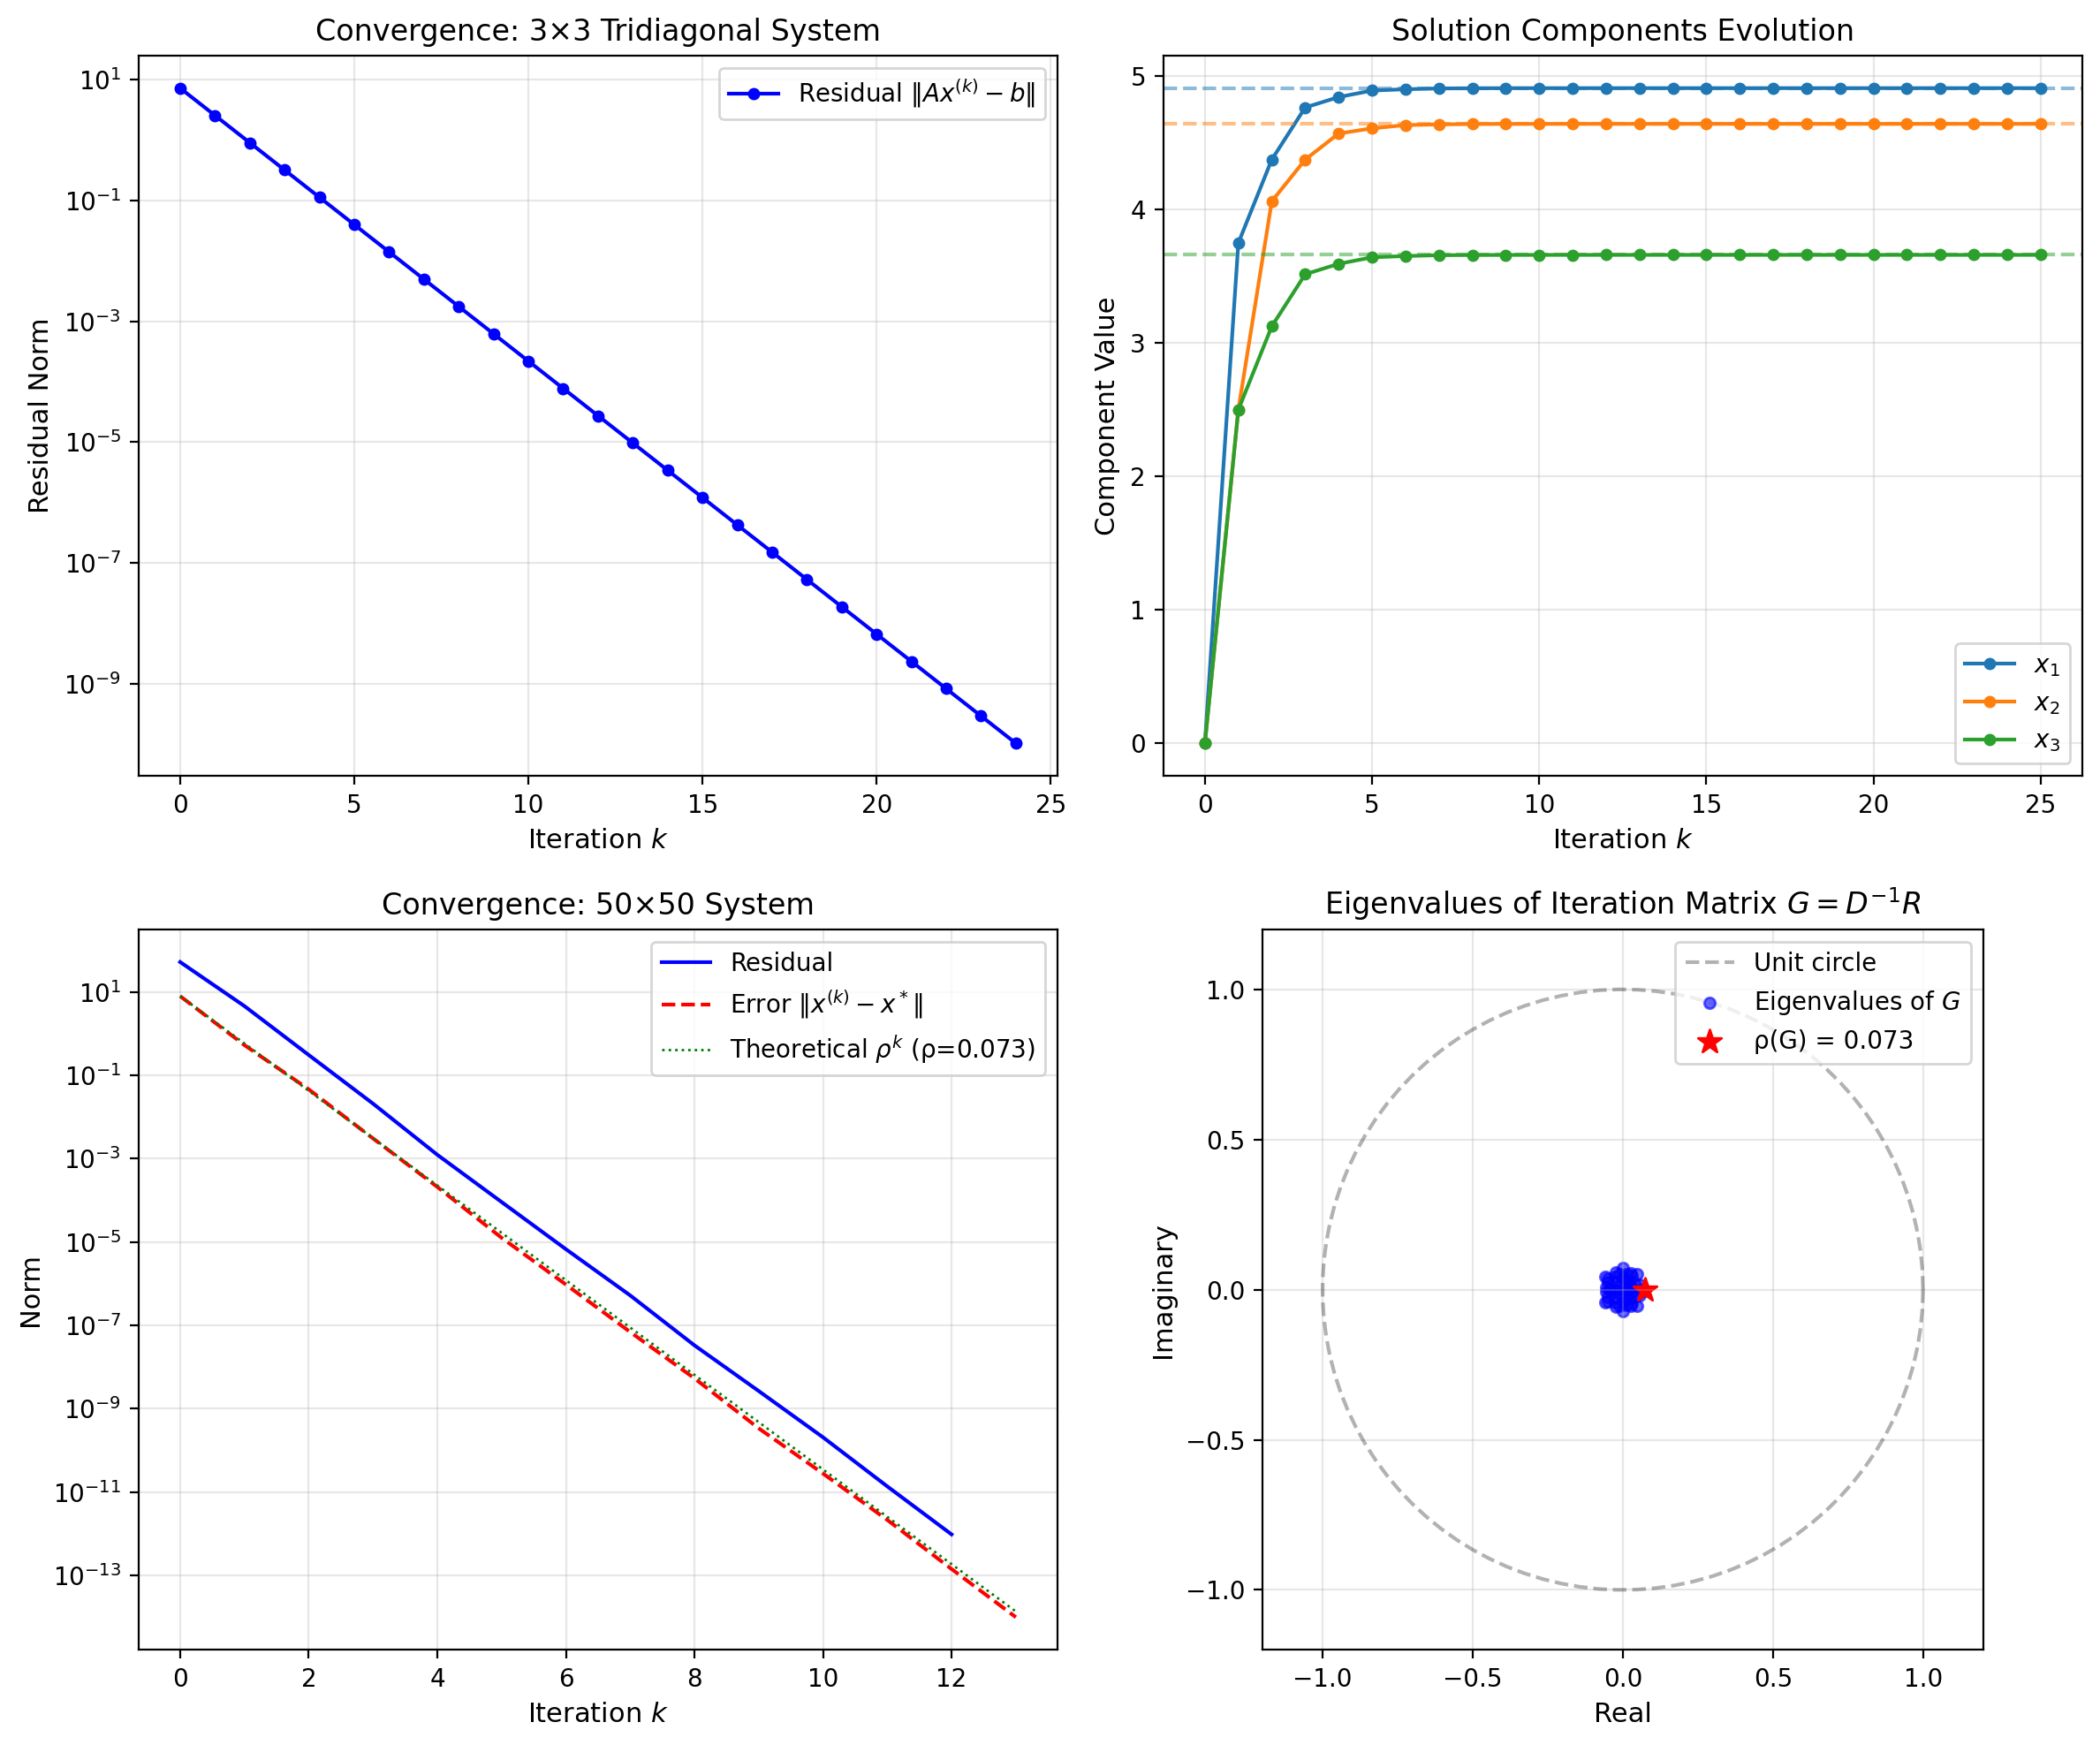


Plot saved to 'plot.png'


In [8]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Residual convergence for small system
ax1 = axes[0, 0]
ax1.semilogy(residuals1, 'b-o', markersize=4, label='Residual $\\|Ax^{(k)} - b\\|$')
ax1.set_xlabel('Iteration $k$', fontsize=11)
ax1.set_ylabel('Residual Norm', fontsize=11)
ax1.set_title('Convergence: 3×3 Tridiagonal System', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Component evolution for small system
ax2 = axes[0, 1]
history_array = np.array(history1)
for i in range(3):
    ax2.plot(history_array[:, i], '-o', markersize=4, label=f'$x_{i+1}$')
    ax2.axhline(y=x_exact[i], color=f'C{i}', linestyle='--', alpha=0.5)
ax2.set_xlabel('Iteration $k$', fontsize=11)
ax2.set_ylabel('Component Value', fontsize=11)
ax2.set_title('Solution Components Evolution', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Residual and error for large system
ax3 = axes[1, 0]
iterations = range(len(residuals2))
ax3.semilogy(iterations, residuals2, 'b-', linewidth=1.5, label='Residual')
ax3.semilogy(range(len(errors2)), errors2, 'r--', linewidth=1.5, label='Error $\\|x^{(k)} - x^*\\|$')

# Add theoretical convergence rate
k_theory = np.arange(len(errors2))
theoretical = errors2[0] * (rho2 ** k_theory)
ax3.semilogy(k_theory, theoretical, 'g:', linewidth=1, label=f'Theoretical $\\rho^k$ (ρ={rho2:.3f})')

ax3.set_xlabel('Iteration $k$', fontsize=11)
ax3.set_ylabel('Norm', fontsize=11)
ax3.set_title(f'Convergence: {n}×{n} System', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Eigenvalue distribution of iteration matrix
ax4 = axes[1, 1]
theta = np.linspace(0, 2*np.pi, 100)
ax4.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, label='Unit circle')
ax4.scatter(eigenvalues.real, eigenvalues.imag, c='blue', s=20, alpha=0.6, label='Eigenvalues of $G$')
ax4.scatter([rho2], [0], c='red', s=100, marker='*', label=f'ρ(G) = {rho2:.3f}')
ax4.set_xlabel('Real', fontsize=11)
ax4.set_ylabel('Imaginary', fontsize=11)
ax4.set_title('Eigenvalues of Iteration Matrix $G = D^{-1}R$', fontsize=12)
ax4.set_aspect('equal')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper right')
ax4.set_xlim(-1.2, 1.2)
ax4.set_ylim(-1.2, 1.2)

plt.tight_layout()
plt.savefig('jacobi_iterative_method_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Comparison: Effect of Diagonal Dominance

In [9]:
# Compare convergence for different levels of diagonal dominance
dominance_factors = [1.5, 2.0, 3.0, 5.0]
n_test = 30

print("Effect of Diagonal Dominance on Convergence")
print("=" * 50)
print(f"{'Factor':<10} {'ρ(G)':<10} {'Iterations':<12} {'Final Error':<12}")
print("-" * 50)

for factor in dominance_factors:
    A_test = create_diagonally_dominant_matrix(n_test, dominance_factor=factor)
    x_true_test = np.ones(n_test)
    b_test = A_test @ x_true_test
    
    rho_test, _ = compute_spectral_radius(A_test)
    x_sol_test, res_test, _ = jacobi_iteration(A_test, b_test, tol=1e-10)
    
    error = norm(x_sol_test - x_true_test)
    print(f"{factor:<10.1f} {rho_test:<10.4f} {len(res_test):<12} {error:<12.2e}")

Effect of Diagonal Dominance on Convergence
Factor     ρ(G)       Iterations   Final Error 
--------------------------------------------------
1.5        0.1791     15           4.08e-12    
2.0        0.1235     13           4.69e-12    
3.0        0.0816     11           1.74e-12    
5.0        0.0465     9            3.47e-12    


## Conclusions

The Jacobi iterative method demonstrates several key properties:

1. **Linear Convergence**: The error decreases geometrically with rate governed by $\rho(\mathbf{G})$

2. **Diagonal Dominance**: Stronger diagonal dominance leads to faster convergence (smaller spectral radius)

3. **Parallelizability**: Each component can be updated independently, making Jacobi suitable for parallel computation

4. **Simplicity vs. Speed**: While simple to implement, Jacobi typically converges slower than Gauss-Seidel or SOR methods

### Theoretical Complexity

- **Per iteration**: $O(n^2)$ for dense matrices, $O(\text{nnz})$ for sparse
- **Total iterations**: $O\left(\frac{\log(\epsilon)}{\log(\rho)}\right)$ for tolerance $\epsilon$